In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import reader as r

In [70]:
df = r.from_txt('23.11.22.txt')

Датасет содержит информацию о кипении при различных физических параметрах
Чуть подробнее напишу в статье на хабре, тут нужно у экспериментатров просто уточнить, что под чем они имели ввиду

In [71]:
df.head()

,Tw K,dTliq K,P atm.,Ts K,L m,Rw kg/m3,Cw J/kg/K,Kw W/m/K,Rl kg/m3,Cl J/kg/K,Kl W/m/K,Ll Pa*sec,Q N/m,dH J/kg,Tlim K
0,434.140,47.70719,1.0,350.8672,0.025,19344.37,129.8458,323.44,782.8507,2963.538,0.166687,0.000752,0.015873,879195.0,453.3142
1,463.498,78.45683,3.0,381.6168,0.025,19344.37,129.8458,323.44,768.3917,3131.805,0.163572,0.000576,0.012220,815680.2,455.2949
2,473.040,95.18899,5.0,398.3490,0.025,19344.37,129.8458,323.44,759.7735,3218.704,0.161794,0.000502,0.010324,776130.4,457.2756
3,468.936,75.18899,5.0,398.3490,0.025,19344.37,129.8458,323.44,748.8631,3318.569,0.159567,0.000429,0.010324,776130.4,457.2756
4,458.847,58.45683,3.0,381.6168,0.025,19344.37,129.8458,323.44,758.0337,3235.306,0.161438,0.000489,0.012220,815680.2,455.2949


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tw K       514 non-null    float64
 1   dTliq K    514 non-null    float64
 2   P atm.     514 non-null    float64
 3   Ts K       514 non-null    float64
 4   L m        514 non-null    float64
 5   Rw kg/m3   514 non-null    float64
 6   Cw J/kg/K  514 non-null    float64
 7   Kw W/m/K   514 non-null    float64
 8   Rl kg/m3   492 non-null    float64
 9   Cl J/kg/K  492 non-null    float64
 10  Kl W/m/K   492 non-null    float64
 11  Ll Pa*sec  492 non-null    float64
 12  Q N/m      514 non-null    float64
 13  dH J/kg    514 non-null    float64
 14  Tlim K     514 non-null    float64
dtypes: float64(15)
memory usage: 60.4 KB


Строк с NA не так много, поэтому их можно без особого страха выкинуть

In [73]:
df = df.dropna()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 513
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tw K       492 non-null    float64
 1   dTliq K    492 non-null    float64
 2   P atm.     492 non-null    float64
 3   Ts K       492 non-null    float64
 4   L m        492 non-null    float64
 5   Rw kg/m3   492 non-null    float64
 6   Cw J/kg/K  492 non-null    float64
 7   Kw W/m/K   492 non-null    float64
 8   Rl kg/m3   492 non-null    float64
 9   Cl J/kg/K  492 non-null    float64
 10  Kl W/m/K   492 non-null    float64
 11  Ll Pa*sec  492 non-null    float64
 12  Q N/m      492 non-null    float64
 13  dH J/kg    492 non-null    float64
 14  Tlim K     492 non-null    float64
dtypes: float64(15)
memory usage: 61.5 KB


In [75]:
df.describe().transpose()[['min' ,'25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
Tw K,379.681000,465.199250,529.888000,6.235390e+02,9.438640e+02
dTliq K,-0.570145,27.707190,46.840130,6.770719e+01,1.477072e+02
P atm.,1.000000,1.000000,1.000000,2.000000e+00,5.000000e+00
Ts K,330.000100,350.867200,355.707200,3.725899e+02,4.247647e+02
L m,0.025000,0.025000,0.025000,2.500000e-02,2.500000e-02
Rw kg/m3,4491.136000,7752.499000,8893.891000,8.961629e+03,1.934437e+04
Cw J/kg/K,129.845800,387.584400,469.740100,5.062802e+02,6.345912e+02
Kw W/m/K,13.251350,21.201920,88.433850,3.952542e+02,4.052936e+02
Rl kg/m3,737.397700,778.352300,842.866100,9.634532e+02,1.734866e+03
Cl J/kg/K,938.998900,3004.460000,3274.985000,4.195145e+03,4.246148e+03


In [76]:
df = df.drop('L m', axis=1)

Эта величина постоянна, поэтому для модели машинного обучения она не содержит важной информации

<AxesSubplot: xlabel='Tw K', ylabel='Count'>

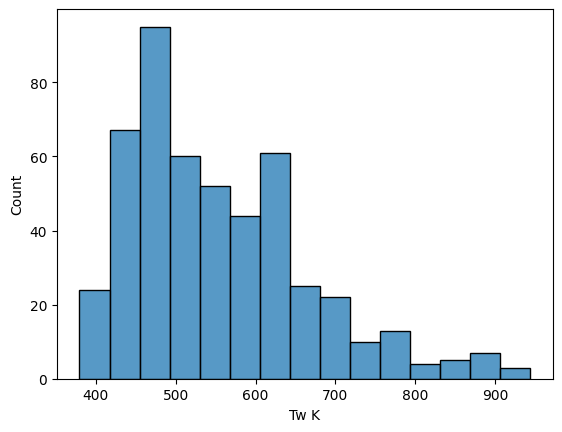

In [77]:
sns.histplot(data=df, x='Tw K')

In [78]:
df = df[df['Tw K'] < 700]

Данных для столь высоких температур мало, поэтому разумным решением будет не включать их модель
Да, это ограничет область применимости, но модель будет лучше работать на оставшемся диапозоне

<AxesSubplot: xlabel='Tw K', ylabel='Count'>

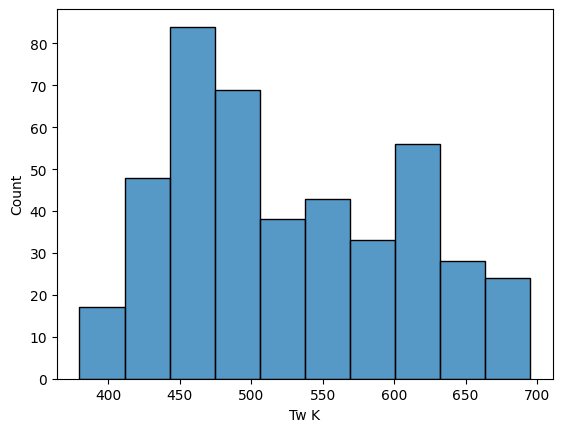

In [79]:
sns.histplot(data=df, x='Tw K')

In [80]:
df.corr()['Tw K']

Tw K         1.000000
dTliq K     -0.135680
P atm.       0.076817
Ts K         0.473913
Rw kg/m3    -0.219091
Cw J/kg/K    0.312516
Kw W/m/K    -0.236682
Rl kg/m3    -0.164583
Cl J/kg/K    0.660664
Kl W/m/K     0.678662
Ll Pa*sec   -0.257604
Q N/m        0.644894
dH J/kg      0.699366
Tlim K       0.733112
Name: Tw K, dtype: float64

<AxesSubplot: >

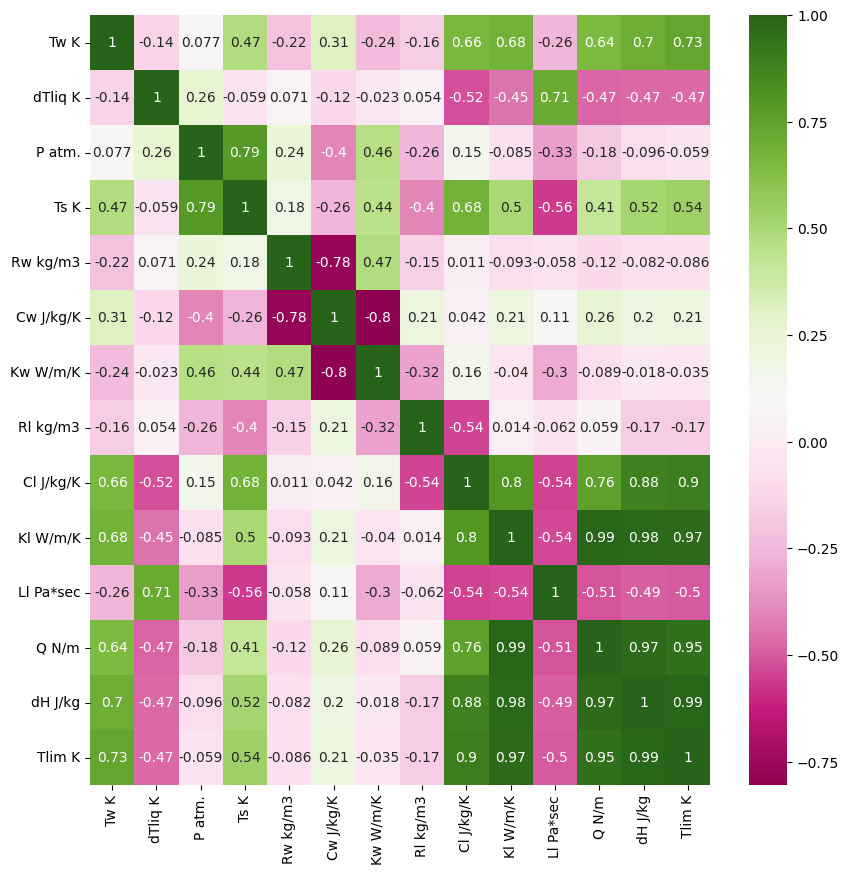

In [81]:
plt.figure(figsize=(10,10), dpi=100)

sns.heatmap(data=df.corr(), cmap='PiYG', annot=True)

Для физических задач характерна большая корреляция между переменными, однако для моделей машинного обучения это не очень хорошо
поэтому найдем максимальное количество слабосвязанных между собой переменных

Для поиска оптимального набора переменных воспользуемся методом максимальных клик
подробнее о таком методе можно почитать тут: https://habr.com/ru/companies/akbarsdigital/articles/592493/

сильной корреляцией между переменными будем считать 0.6

In [82]:
import networkx as nx

correlationGraph = nx.Graph()

In [83]:
correlationMatrix = df.drop('Tw K', axis=1).corr()

correlationMatrix

,dTliq K,P atm.,Ts K,Rw kg/m3,Cw J/kg/K,Kw W/m/K,Rl kg/m3,Cl J/kg/K,Kl W/m/K,Ll Pa*sec,Q N/m,dH J/kg,Tlim K
dTliq K,1.000000,0.262111,-0.059272,0.070715,-0.116219,-0.023370,0.053603,-0.519797,-0.448565,0.712700,-0.474009,-0.470490,-0.472998
P atm.,0.262111,1.000000,0.785618,0.237806,-0.397492,0.463739,-0.255125,0.147154,-0.084708,-0.332285,-0.182603,-0.096497,-0.059066
Ts K,-0.059272,0.785618,1.000000,0.179387,-0.264997,0.443580,-0.399269,0.681090,0.502746,-0.562230,0.410027,0.518055,0.538562
Rw kg/m3,0.070715,0.237806,0.179387,1.000000,-0.775523,0.474897,-0.151529,0.010857,-0.092995,-0.058406,-0.118769,-0.081738,-0.085671
Cw J/kg/K,-0.116219,-0.397492,-0.264997,-0.775523,1.000000,-0.804778,0.214776,0.041574,0.214803,0.111018,0.257122,0.202586,0.208458
Kw W/m/K,-0.023370,0.463739,0.443580,0.474897,-0.804778,1.000000,-0.315875,0.163233,-0.040229,-0.295688,-0.088778,-0.018097,-0.035005
Rl kg/m3,0.053603,-0.255125,-0.399269,-0.151529,0.214776,-0.315875,1.000000,-0.542197,0.013545,-0.061512,0.058875,-0.165934,-0.169274
Cl J/kg/K,-0.519797,0.147154,0.681090,0.010857,0.041574,0.163233,-0.542197,1.000000,0.797641,-0.544127,0.756483,0.881760,0.897976
Kl W/m/K,-0.448565,-0.084708,0.502746,-0.092995,0.214803,-0.040229,0.013545,0.797641,1.000000,-0.536750,0.992369,0.981393,0.970078
Ll Pa*sec,0.712700,-0.332285,-0.562230,-0.058406,0.111018,-0.295688,-0.061512,-0.544127,-0.536750,1.000000,-0.511136,-0.494171,-0.501320


In [84]:
edges = []

for i in range(len(correlationMatrix)):
    for j in range(i+1, len(correlationMatrix)):
        if np.abs(correlationMatrix.iloc[i, j]) < 0.6:
            edges.append((i, j))

In [85]:
print(edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (7, 9), (8, 9), (9, 10), (9, 11), (9, 12)]


In [86]:
nodes = list(range(len(correlationMatrix.columns)))
nodes   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [87]:
correlationGraph.add_nodes_from(nodes)
correlationGraph.add_edges_from(edges)

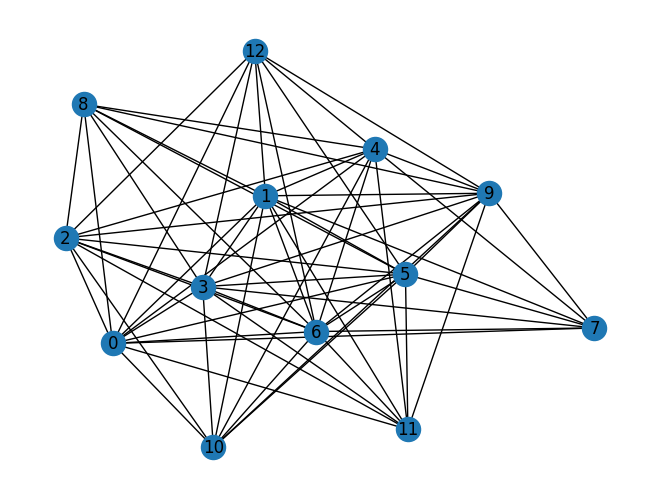

In [88]:
nx.draw(correlationGraph, with_labels = True)
plt.show()

Вот такой получился граф, теперь визуализируем его с подписями

In [89]:
from pyvis.network import Network

visualizationGraph = Network(notebook=True)

visualizationGraph.from_nx(correlationGraph)
visualizationGraph.show('nx.html');
#при желании можно открыть)

nx.html


In [90]:
cliques = list(nx.find_cliques(correlationGraph))
#нас интересуют только самые крупые
cliques

[[6, 0, 1, 3, 5, 7],
 [6, 0, 1, 3, 5, 8],
 [6, 0, 1, 3, 5, 10],
 [6, 0, 1, 3, 5, 11],
 [6, 0, 1, 3, 5, 12],
 [6, 0, 1, 4, 7],
 [6, 0, 1, 4, 8],
 [6, 0, 1, 4, 10],
 [6, 0, 1, 4, 11],
 [6, 0, 1, 4, 12],
 [6, 0, 2, 3, 5, 8],
 [6, 0, 2, 3, 5, 10],
 [6, 0, 2, 3, 5, 11],
 [6, 0, 2, 3, 5, 12],
 [6, 0, 2, 4, 8],
 [6, 0, 2, 4, 10],
 [6, 0, 2, 4, 11],
 [6, 0, 2, 4, 12],
 [6, 9, 1, 3, 5, 7],
 [6, 9, 1, 3, 5, 8],
 [6, 9, 1, 3, 5, 10],
 [6, 9, 1, 3, 5, 11],
 [6, 9, 1, 3, 5, 12],
 [6, 9, 1, 4, 7],
 [6, 9, 1, 4, 8],
 [6, 9, 1, 4, 10],
 [6, 9, 1, 4, 11],
 [6, 9, 1, 4, 12],
 [6, 9, 2, 3, 5, 8],
 [6, 9, 2, 3, 5, 10],
 [6, 9, 2, 3, 5, 11],
 [6, 9, 2, 3, 5, 12],
 [6, 9, 2, 4, 8],
 [6, 9, 2, 4, 10],
 [6, 9, 2, 4, 11],
 [6, 9, 2, 4, 12]]

In [91]:
m = max([len(clique) for clique in cliques])
for i in range(len(cliques) - 1, -1, -1):
    if len(cliques[i]) < m:
        cliques.pop(i)

cliques

[[6, 0, 1, 3, 5, 7],
 [6, 0, 1, 3, 5, 8],
 [6, 0, 1, 3, 5, 10],
 [6, 0, 1, 3, 5, 11],
 [6, 0, 1, 3, 5, 12],
 [6, 0, 2, 3, 5, 8],
 [6, 0, 2, 3, 5, 10],
 [6, 0, 2, 3, 5, 11],
 [6, 0, 2, 3, 5, 12],
 [6, 9, 1, 3, 5, 7],
 [6, 9, 1, 3, 5, 8],
 [6, 9, 1, 3, 5, 10],
 [6, 9, 1, 3, 5, 11],
 [6, 9, 1, 3, 5, 12],
 [6, 9, 2, 3, 5, 8],
 [6, 9, 2, 3, 5, 10],
 [6, 9, 2, 3, 5, 11],
 [6, 9, 2, 3, 5, 12]]

In [92]:
X = df.drop('Tw K', axis = 1)
y = df['Tw K']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=251002)

In [94]:
#получим все возможные попарно неколлинеарные наборы придекторов
polyTrainX = []
polyTestX = []

for i in range(len(cliques)):
    polyTrainX.append(X_train[X_train.columns[cliques[i]]])
    polyTestX.append(X_test[X_test.columns[cliques[i]]])

In [95]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [96]:
def make_grid(model, degree, param_grid, x_train, y_train) -> list[GridSearchCV]:
    grids = []

    for i in range(len(polyTrainX)):
        pipe = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('preprocessor', PolynomialFeatures(degree)),
                        ('model', model)
                        ])
        grid = GridSearchCV(pipe, param_grid)
        grid.fit(x_train[i], y_train)
        grids.append(grid)
    
    return grids

In [129]:
grids = make_grid(model=Lasso(max_iter=10000), degree=4,
                  param_grid={'model__alpha' : [0, 0.01, 0.1, 0.2, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2, 5, 10, 15]},
                  x_train=polyTrainX, y_train=y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+05, tolerance: 1.670e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

In [130]:
for grid in grids:
    print(grid.best_params_)

{'model__alpha': 1.7}
{'model__alpha': 1.2}
{'model__alpha': 1.2}
{'model__alpha': 1.2}
{'model__alpha': 1.7}
{'model__alpha': 1}
{'model__alpha': 1}
{'model__alpha': 1}
{'model__alpha': 0.7}
{'model__alpha': 5}
{'model__alpha': 5}
{'model__alpha': 0.1}
{'model__alpha': 5}
{'model__alpha': 5}
{'model__alpha': 5}
{'model__alpha': 5}
{'model__alpha': 5}
{'model__alpha': 5}


In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
predictions = []
RMSE = []
for i in range(len(polyTestX)):
    prediction = grids[i].predict(polyTestX[i])
    predictions.append(prediction)
    RMSE.append(np.sqrt(mean_squared_error(y_test, prediction)))

RMSE

[40.8074279183918,
 41.96453237123014,
 42.90566616152294,
 41.836021946532426,
 40.538364582131,
 41.00111590518133,
 42.07912596566031,
 41.58059229426991,
 37.89952043327921,
 51.97945356343388,
 53.7617005682613,
 43.69900296173004,
 53.41187235789037,
 52.02441002926917,
 53.469292452461254,
 53.16599975162854,
 53.136496009530866,
 51.94826053898298]

In [133]:
final_pipe = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('preprocessor', PolynomialFeatures(4)),
                        ('model', Lasso(max_iter=10000, alpha=0.7))
                        ])
final_pipe.fit(polyTrainX[8], y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('preprocessor', PolynomialFeatures(degree=4)),
                ('model', Lasso(alpha=0.7, max_iter=10000))])

In [134]:
final_pipe['model'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.45814508e+01,  1.36294668e+01,
       -0.00000000e+00, -0.00000000e+00,  5.59073532e+01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.08041570e+00,  0.00000000e+00, -0.00000000e+00,
       -9.41779947e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.83101291e-01, -8.36844828e+00,  0.00000000e+00,  0.00000000e+00,
        1.95150568e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.10180943e+00,  4.17154470e+00, -0.00000000e+00,
        0.00000000e+00,  

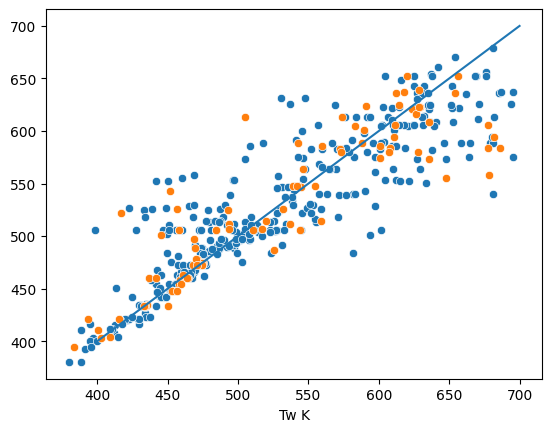

In [135]:
pred = final_pipe.predict(polyTestX[8])
pred2 = final_pipe.predict(polyTrainX[8])
sns.scatterplot(x=y_train, y=pred2)
sns.scatterplot(x=y_test, y=pred)
x = np.linspace(400, 700)
plt.plot(x, x)

In [136]:
residuals = pred - y_test

<AxesSubplot: xlabel='Tw K', ylabel='Count'>

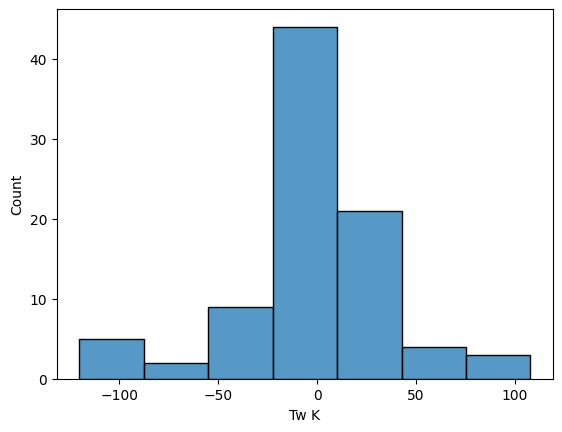

In [137]:
sns.histplot(residuals, bins=7)